abdullah Abusabba<br>
alajmi7abdullah@gmail.com<br>
First Project Week one

extracting local area and global temperature from the database

``` mysql
SELECT year,avg_temp FROM city_data
WHERE city='Riyadh'; 
```
``` mysql
SELECT year,avg_temp FROM global_data
WHERE year>=1843 AND year <=2013; 
```

* <h4> extracting data from sql to pull the intended data
* <h4> importing libraries to manipulate data with pandas and Applying matplotlib visualization  

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#loading datasets
riyadh_data=pd.read_csv('Riyadh_data.csv')
global_data=pd.read_csv('global.csv')

<h1> exploring data using pandas:
>* head()
* info()
* describe()

In [5]:
riyadh_data.head()

,year,avg_temp
0,1843,24.74
1,1844,15.45
2,1845,20.82
3,1846,NaN
4,1847,NaN


In [6]:
riyadh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    169 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [7]:
riyadh_data.describe()

,year,avg_temp
count,171.000000,169.000000
mean,1928.000000,25.214142
std,49.507575,1.046984
min,1843.000000,15.450000
25%,1885.500000,24.870000
50%,1928.000000,25.150000
75%,1970.500000,25.590000
max,2013.000000,27.780000


In [8]:
global_data.head()

,year,avg_temp
0,1843,8.17
1,1844,7.65
2,1845,7.85
3,1846,8.55
4,1847,8.09


In [9]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 2 columns):
year        171 non-null int64
avg_temp    171 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [10]:
global_data.describe()

,year,avg_temp
count,171.000000,171.000000
mean,1928.000000,8.536784
std,49.507575,0.464516
min,1843.000000,7.560000
25%,1885.500000,8.180000
50%,1928.000000,8.520000
75%,1970.500000,8.760000
max,2013.000000,9.730000


*  <h4>  front filling nan valuse 
*  <h4> calculating simple Moving average (8 years window) 
* <h4> data Visualization using matplotlib.pyplot 

In [11]:
riyadh_data=riyadh_data.fillna(method='ffill',inplace=False)

In [12]:
riyadh_sma=riyadh_data['avg_temp'].rolling(8).mean()
global_sma=global_data['avg_temp'].rolling(8).mean()
years=global_data['year']

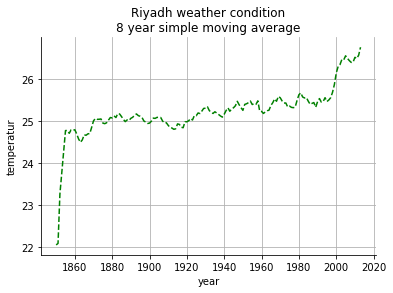

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(years,riyadh_sma,'r--',color='green')
plt.title('Riyadh weather condition\n8 year simple moving average')
plt.ylabel('temperatur')
plt.xlabel('year')
plt.grid()
plt.show()

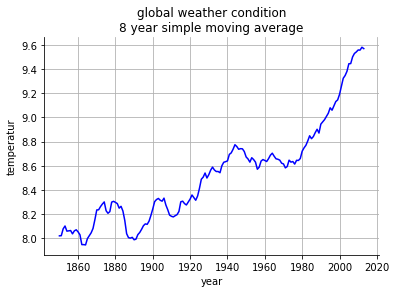

In [14]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(years,global_sma,color='blue')
plt.title('global weather condition\n8 year simple moving average')
plt.ylabel('temperatur')
plt.xlabel('year')
plt.grid()
plt.show()

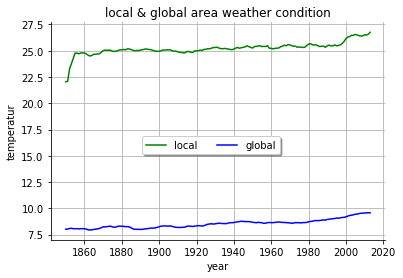

In [15]:
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(years,riyadh_sma,color='green',label='local')
plt.plot(years,global_sma,color='blue',label='global')
plt.title('local & global area weather condition')
plt.ylabel('temperatur')
plt.xlabel('year')
plt.legend(bbox_to_anchor=(.7, .5),shadow=True, ncol=2)
plt.grid()
plt.show()

In [16]:
riyadh_sma.corr(global_sma)

0.7949962149610269

In [17]:
riyadh_sma.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    22.04375
8    22.08000
9    23.25500
Name: avg_temp, dtype: float64

In [18]:
riyadh_sma.tail(10)

161    26.45250
162    26.55000
163    26.48875
164    26.43500
165    26.39250
166    26.39750
167    26.51375
168    26.48625
169    26.56500
170    26.75375
Name: avg_temp, dtype: float64

In [19]:
26.75375-22.04375

4.710000000000001

In [20]:
global_sma.head(10)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7    8.02125
8    8.02250
9    8.07875
Name: avg_temp, dtype: float64

In [21]:
global_sma.tail(10)

161    9.38000
162    9.44250
163    9.44375
164    9.49875
165    9.52750
166    9.54000
167    9.55625
168    9.55500
169    9.57875
170    9.56750
Name: avg_temp, dtype: float64

In [22]:
9.56750-8.02125

1.5462500000000006

# outline 
>* <h4> Both of local and global areas temperature are increasing over time
*  <h4> Global temperature average=8.536784 Whereas  Riyadh temperature average=25.214142
* <h4> The correlation between the datasets are strong correlation=0.79 
* <h4> from the visualization and exploring the data we can see that the difference between the highest and lowest temperature of Riyadh is 4.7 Whereas the global difference is 1.54